# EXPLORATORY DATA ANALYSIS
Using Absenteeism at work An UCI dataset

## About Dataset

### Abstract
The database was created with records of absenteeism at work from July 2007 to July 2010 at a courier company in Brazil. Absenteeism at work An UCI dataset on link data set : https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work


    Data Set Characteristics  : Multivariate, Time-Series                Number of Instances   : 740 
    Attribute Characteristics : Integer, Real                            Number of Attributes  : 21
    Associated Tasks          : Classification, Clustering               Missing Values?       : N/A


### Metadata
    Usage Information             License                     CC0: Public Domain (https://creativecommons.org/publicdomain/zero/1.0//)
                                  Visibility                  visibility Public
    
    Provenance                    Sources                     (https://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work)

    Maintainers                   Dataset owner               rahul bhaskaran (https://www.kaggle.com/loganalive)

    Updates                       Expected update frequency   Never
                                  Last updated                2018-04-27                 
                                  Date created                2018-04-27                  
                                  Current version             Version 1

### Data set information
The data set allows for several new combinations of attributes and attribute exclusions, or the modification of the attribute type (categorical, integer, or real) depending on the purpose of the research.The data set (Absenteeism at work - Part I) was used in academic research at the Universidade Nove de Julho - Postgraduate Program in Informatics and Knowledge Management.

### Attribute Information
  1. Individual identification (ID)
  2. Reason for absence (ICD).
    
    Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

    
    I Certain infectious and parasitic diseases
    II Neoplasms
    III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
    IV Endocrine, nutritional and metabolic diseases
    V Mental and behavioural disorders
    VI Diseases of the nervous system
    VII Diseases of the eye and adnexa
    VIII Diseases of the ear and mastoid process
    IX Diseases of the circulatory system
    X Diseases of the respiratory system
    XI Diseases of the digestive system
    XII Diseases of the skin and subcutaneous tissue
    XIII Diseases of the musculoskeletal system and connective tissue
    XIV Diseases of the genitourinary system
    XV Pregnancy, childbirth and the puerperium
    XVI Certain conditions originating in the perinatal period
    XVII Congenital malformations, deformations and chromosomal abnormalities
    XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
    XIX Injury, poisoning and certain other consequences of external causes
    XX External causes of morbidity and mortality
    XXI Factors influencing health status and contact with health services.

    And 7 categories without (CID) 
    patient follow-up (22), 
    medical consultation (23), 
    blood donation (24), 
    laboratory examination (25), 
    unjustified absence (26), 
    physiotherapy (27), 
    dental consultation (28).
        
  3. Month of absence
  4. Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
  5. Seasons (summer (1), autumn (2), winter (3), spring (4))
  6. Transportation expense
  7. Distance from Residence to Work (kilometers)
  8. Service time
  9. Age
  10. Work load Average/day
  11. Hit target
  12. Disciplinary failure (yes=1; no=0)
  13. Education (high school (1), graduate (2), postgraduate (3), master and doctor (4))
  14. Son (number of children)
  15. Social drinker (yes=1; no=0)
  16. Social smoker (yes=1; no=0)
  17. Pet (number of pet)
  18. Weight
  19. Height
  20. Body mass index
  21. Absenteeism time in hours (target)


## Import and Clean Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_data = pd.read_csv('./absenteeism_at_work_dataset/Absenteeism_at_work.csv', sep=';')

In [3]:
raw_data.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [4]:
raw_data.shape

(740, 21)

In [5]:
raw_data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

O que precisa ser feito em termos de pré-processamento? Devemos examinar os dados cuidadosamente. Mas antes disso, vamos fazer uma cópia do nosso dataset.

In [6]:
df = raw_data.copy()

In [7]:
#Permitir que mais linhas sejam exibidas
pd.options.display.max_rows = 100

In [8]:
display(df)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


Primeiro vamos renomear as colunas para facilitar a manipulação de dados.

In [9]:
df.rename(columns={'Reason for absence': 'Reason', 'Month of absence': 'Month', 'Day of the week': 'Weekday',
                   'Seasons': 'Season', 'Disciplinary failure': 'Failure', 'Transportation expense': 'TransportExpense',
                   'Distance from Residence to Work': 'Distance', 'Service time': 'ServiceTime', 'Work load Average/day ': 'Workload',
                   'Hit target': 'HitTarget', 'Son': 'Child', 'Social drinker': 'Drinker', 'Social smoker': 'Smoker', 'Body mass index': 'BMI',
                   'Absenteeism time in hours': 'AbsHours'}, inplace = True)
df.head(10)

,ID,Reason,Month,Weekday,Season,TransportExpense,Distance,ServiceTime,Age,Workload,...,Failure,Education,Child,Drinker,Smoker,Pet,Weight,Height,BMI,AbsHours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


Suponha que queremos saber a quantidade de missing values e o conjunto de dados é BEM MAIOR do que este.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                740 non-null    int64  
 1   Reason            740 non-null    int64  
 2   Month             740 non-null    int64  
 3   Weekday           740 non-null    int64  
 4   Season            740 non-null    int64  
 5   TransportExpense  740 non-null    int64  
 6   Distance          740 non-null    int64  
 7   ServiceTime       740 non-null    int64  
 8   Age               740 non-null    int64  
 9   Workload          740 non-null    float64
 10  HitTarget         740 non-null    int64  
 11  Failure           740 non-null    int64  
 12  Education         740 non-null    int64  
 13  Child             740 non-null    int64  
 14  Drinker           740 non-null    int64  
 15  Smoker            740 non-null    int64  
 16  Pet               740 non-null    int64  
 1

Podemos ver que todas as colunas têm exatamente 740 valores. Isso significa que **não temos** valores faltantes (missing values).

### Change the appropriate data types of the columns

In [11]:
df.dtypes

ID                    int64
Reason                int64
Month                 int64
Weekday               int64
Season                int64
TransportExpense      int64
Distance              int64
ServiceTime           int64
Age                   int64
Workload            float64
HitTarget             int64
Failure               int64
Education             int64
Child                 int64
Drinker               int64
Smoker                int64
Pet                   int64
Weight                int64
Height                int64
BMI                   int64
AbsHours              int64
dtype: object

Todos os atributos estão como inteiros ou float. Mas se analisarmos o dicionário de dados, percebemos que existem variáveis categóricas e booleanas.


**Reason of Abesence**

In [12]:
df['Reason'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [13]:
df['Reason'].min()

0

In [14]:
df['Reason'].max()

28

In [15]:
len(df['Reason'].unique())

28

Parece que temos uma categoria que não aparece na base de dados. Qual é?

In [16]:
sorted(df['Reason'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

A categoria 20, External causes of morbidity and mortality, não aparece nenhuma vez. Voltaremos a manipular esta coluna quando estivermos preparando a base de dados para aplicar algum algoritmo de ML.

In [17]:
df['Reason'] = df['Reason'].astype('category')

In [18]:
df['Reason'].dtypes

CategoricalDtype(categories=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
                  15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28],
, ordered=False)

**Month, Weekday and Season**

In [19]:
df['Month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6,  0])

In [20]:
len(df['Month'].unique())

13

Temos uma categoria 0 para representar o mês e provavelmente os registros com este valor estão corrompidos. **Vamos remover essas linhas.**

In [21]:
df[df['Month']==0]

,ID,Reason,Month,Weekday,Season,TransportExpense,Distance,ServiceTime,Age,Workload,...,Failure,Education,Child,Drinker,Smoker,Pet,Weight,Height,BMI,AbsHours
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0
739,35,0,0,6,3,179,45,14,53,271.219,...,0,1,1,0,0,1,77,175,25,0


In [22]:
df = df[df['Month'] != 0]

In [23]:
df.shape

(737, 21)

In [24]:
#Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
df['Weekday'].unique()

array([3, 4, 5, 6, 2])

In [25]:
#Seasons (summer (1), autumn (2), winter (3), spring (4))
df['Season'].unique()

array([1, 4, 2, 3])

In [26]:
df['Month'] = df['Month'].astype('category')
df['Weekday'] = df['Weekday'].astype('category')
df['Season'] = df['Season'].astype('category')

**Education**

In [27]:
df['Education'].unique()

array([1, 3, 2, 4])

In [28]:
df['Education'] = df['Education'].astype('category')

In [29]:
df.dtypes

ID                     int64
Reason              category
Month               category
Weekday             category
Season              category
TransportExpense       int64
Distance               int64
ServiceTime            int64
Age                    int64
Workload             float64
HitTarget              int64
Failure                int64
Education           category
Child                  int64
Drinker                int64
Smoker                 int64
Pet                    int64
Weight                 int64
Height                 int64
BMI                    int64
AbsHours               int64
dtype: object

In [30]:
df['Workload'].max()

378.884

In [31]:
df['Workload'].mean()

271.49133921302604

In [32]:
df['HitTarget'].unique()

array([ 97,  92,  93,  95,  99,  96,  94,  98,  81,  88, 100,  87,  91])

### Creating new columns

Para realizar uma melhor Análise Exploratória dos Dados, é preciso adicionar algumas colunas para visualização.

**Nova coluna para Season**

In [33]:
season_mapping = {1:'Summer', 2:'Autumn', 3:'Winter', 4:'Spring'}
df.loc[:,'season_name'] = df['Season'].map(season_mapping)

In [34]:
df['season_name'].unique()

['Summer', 'Spring', 'Autumn', 'Winter']
Categories (4, object): ['Summer', 'Spring', 'Autumn', 'Winter']

**Nova coluna para Month**

In [35]:
import calendar

In [36]:
df['month_name'] =  df['Month'].apply(lambda x: calendar.month_abbr[x])

In [37]:
df[0:100][['Month', 'month_name']]

,Month,month_name
0,7,Jul
1,7,Jul
2,7,Jul
3,7,Jul
4,7,Jul
5,7,Jul
6,7,Jul
7,7,Jul
8,7,Jul
9,7,Jul


**Nova coluna para Reason**

In [38]:
reason_mapping = {
    0: 'Unknown',
    1: 'Certain infectious and parasitic diseases',
    2: 'Neoplasms',
    3: 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    4: 'Endocrine, nutritional and metabolic diseases',
    5: 'Mental and behavioural disorders',
    6: 'Diseases of the nervous system',
    7: 'Diseases of the eye and adnexa',
    8: 'Diseases of the ear and mastoid process',
    9: 'Diseases of the circulatory system',
    10: 'Diseases of the respiratory system',
    11: 'Diseases of the digestive system',
    12: 'Diseases of the skin and subcutaneous tissue',
    13: 'Diseases of the musculoskeletal system and connective tissue',
    14: 'Diseases of the genitourinary system',
    15: 'Pregnancy, childbirth and the puerperium',
    16: 'Certain conditions originating in the perinatal period',
    17: 'Congenital malformations, deformations and chromosomal abnormalities',
    18: 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
    19: 'Injury, poisoning and certain other consequences of external causes',
    20: 'External causes of morbidity and mortality',
    21: 'Factors influencing health status and contact with health services',
    22: 'Patient follow-up',
    23: 'Medical consultation',
    24: 'Blood donation',
    25: 'Laboratory examination',
    26: 'Unjustified absence',
    27: 'Physiotherapy',
    28: 'Dental consultation'
}
df.loc[:,'reason_description'] = df['Reason'].map(reason_mapping)

In [39]:
df[0:100][['Reason', 'reason_description']]

,Reason,reason_description
0,26,Unjustified absence
1,0,Unknown
2,23,Medical consultation
3,7,Diseases of the eye and adnexa
4,23,Medical consultation
5,23,Medical consultation
6,22,Patient follow-up
7,23,Medical consultation
8,19,"Injury, poisoning and certain other consequenc..."
9,22,Patient follow-up


**Nova coluna para Education**

In [40]:
df['Education'].value_counts()

1    608
3     79
2     46
4      4
Name: Education, dtype: int64

In [41]:
df.loc[(df['Education'] == 1),'education_name'] = 'High school'
df.loc[(df['Education'] == 2),'education_name'] = 'Graduate'
df.loc[(df['Education'] == 3),'education_name'] = 'Postgraduate'
df.loc[(df['Education'] == 4),'education_name'] = 'Master and doctor'

In [42]:
df[100:300][['Education', 'education_name']]

,Education,education_name
100,1,High school
101,3,Postgraduate
102,1,High school
103,1,High school
104,1,High school
...,...,...
295,3,Postgraduate
296,1,High school
297,1,High school
298,1,High school


**Reogazinar as colunas**

In [43]:
df.columns

Index(['ID', 'Reason', 'Month', 'Weekday', 'Season', 'TransportExpense',
       'Distance', 'ServiceTime', 'Age', 'Workload', 'HitTarget', 'Failure',
       'Education', 'Child', 'Drinker', 'Smoker', 'Pet', 'Weight', 'Height',
       'BMI', 'AbsHours', 'season_name', 'month_name', 'reason_description',
       'education_name'],
      dtype='object')

In [44]:
col_names_reordered = ['ID', 'Reason', 'reason_description', 'Month', 'month_name', 'Weekday', 'Season', 'season_name', 
                       'TransportExpense', 'Distance', 'ServiceTime', 'Age', 'Workload', 'HitTarget', 'Failure',
                       'Education', 'education_name', 'Child', 'Drinker', 'Smoker', 'Pet', 'Weight', 'Height',
                       'BMI', 'AbsHours']

In [45]:
df = df[col_names_reordered]
df.head()

,ID,Reason,reason_description,Month,month_name,Weekday,Season,season_name,TransportExpense,Distance,...,Education,education_name,Child,Drinker,Smoker,Pet,Weight,Height,BMI,AbsHours
0,11,26,Unjustified absence,7,Jul,3,1,Summer,289,36,...,1,High school,2,1,0,1,90,172,30,4
1,36,0,Unknown,7,Jul,3,1,Summer,118,13,...,1,High school,1,1,0,0,98,178,31,0
2,3,23,Medical consultation,7,Jul,4,1,Summer,179,51,...,1,High school,0,1,0,0,89,170,31,2
3,7,7,Diseases of the eye and adnexa,7,Jul,5,1,Summer,279,5,...,1,High school,2,1,1,0,68,168,24,4
4,11,23,Medical consultation,7,Jul,5,1,Summer,289,36,...,1,High school,2,1,0,1,90,172,30,2


### **Checkpoint**

In [46]:
df_mod = df.copy()

### Homework

Com base nas informações do dataset, nas colunas Month e Weekday, conseguimos descobrir o ano em que cada registro foi inserido? Se sim, crie uma coluna chamada "Year" com seus respectivos valores. 

In [47]:
df_mod.head()

,ID,Reason,reason_description,Month,month_name,Weekday,Season,season_name,TransportExpense,Distance,...,Education,education_name,Child,Drinker,Smoker,Pet,Weight,Height,BMI,AbsHours
0,11,26,Unjustified absence,7,Jul,3,1,Summer,289,36,...,1,High school,2,1,0,1,90,172,30,4
1,36,0,Unknown,7,Jul,3,1,Summer,118,13,...,1,High school,1,1,0,0,98,178,31,0
2,3,23,Medical consultation,7,Jul,4,1,Summer,179,51,...,1,High school,0,1,0,0,89,170,31,2
3,7,7,Diseases of the eye and adnexa,7,Jul,5,1,Summer,279,5,...,1,High school,2,1,1,0,68,168,24,4
4,11,23,Medical consultation,7,Jul,5,1,Summer,289,36,...,1,High school,2,1,0,1,90,172,30,2


In [48]:
year = []
current_year = 2007
for idx, row in df_mod.iterrows():
	year.append(current_year)
	if df_mod.loc[idx, 'Month'] == 12 and df_mod.loc[idx + 1, 'Month'] == 1:
		current_year += 1

In [49]:
len(year)

737

In [50]:
df_mod.shape

(737, 25)

In [51]:
df_mod.loc[:, 'Year'] = year

In [52]:
df_mod.columns

Index(['ID', 'Reason', 'reason_description', 'Month', 'month_name', 'Weekday',
       'Season', 'season_name', 'TransportExpense', 'Distance', 'ServiceTime',
       'Age', 'Workload', 'HitTarget', 'Failure', 'Education',
       'education_name', 'Child', 'Drinker', 'Smoker', 'Pet', 'Weight',
       'Height', 'BMI', 'AbsHours', 'Year'],
      dtype='object')

In [53]:
pd.options.display.max_rows = 100
df_mod.loc[100:200, ['Month', 'Weekday', 'Year']]

,Month,Weekday,Year
100,12,4,2007
101,12,4,2007
102,12,5,2007
103,12,6,2007
104,12,3,2007
...,...,...,...
196,4,6,2008
197,4,6,2008
198,4,3,2008
199,4,4,2008


## Exploratory Data Analysis

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

In [55]:
df_mod.columns

Index(['ID', 'Reason', 'reason_description', 'Month', 'month_name', 'Weekday',
       'Season', 'season_name', 'TransportExpense', 'Distance', 'ServiceTime',
       'Age', 'Workload', 'HitTarget', 'Failure', 'Education',
       'education_name', 'Child', 'Drinker', 'Smoker', 'Pet', 'Weight',
       'Height', 'BMI', 'AbsHours', 'Year'],
      dtype='object')

In [56]:
df_mod.value_counts(subset=['reason_description'])

reason_description                                                                                 
Medical consultation                                                                                   149
Dental consultation                                                                                    112
Physiotherapy                                                                                           69
Diseases of the musculoskeletal system and connective tissue                                            55
Injury, poisoning and certain other consequences of external causes                                     40
Unknown                                                                                                 40
Patient follow-up                                                                                       38
Unjustified absence                                                                                     33
Laboratory examination                      

In [57]:
order = df_mod['reason_description'].value_counts().index

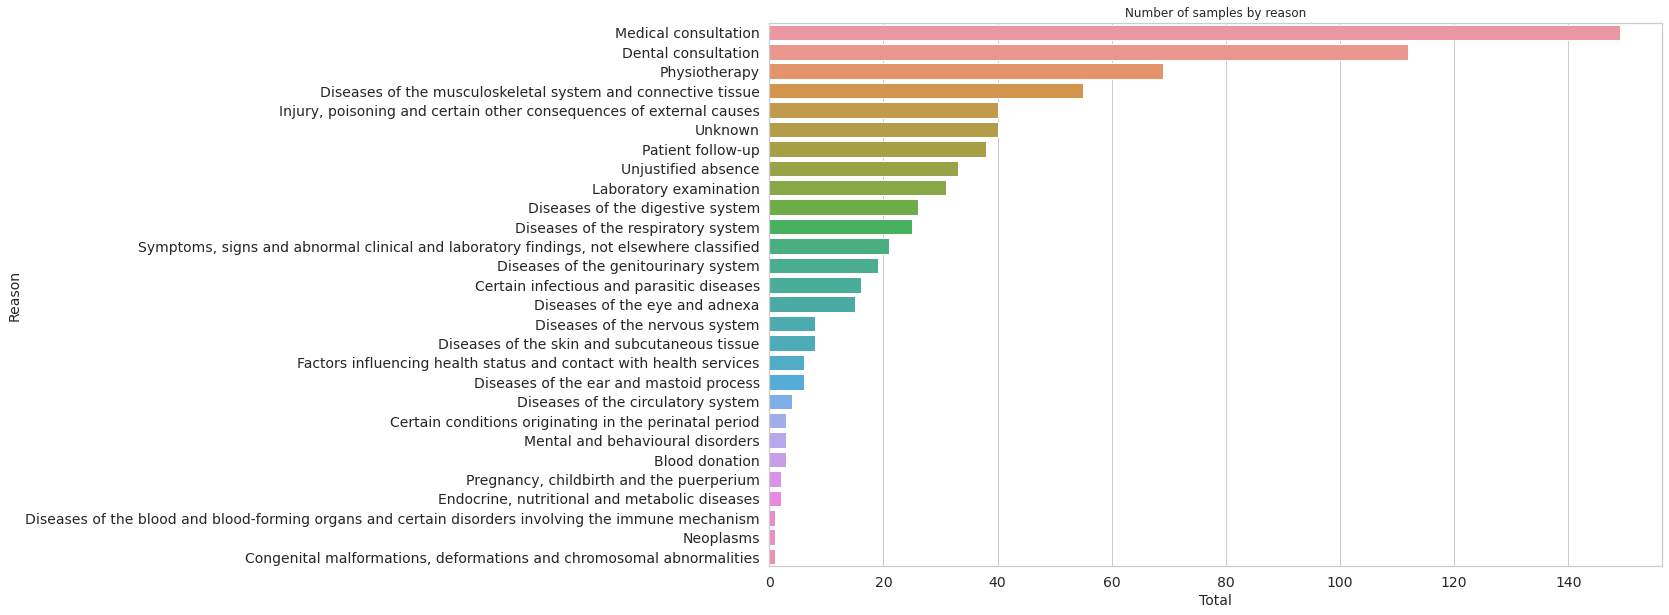

In [58]:
plt.figure(figsize=(16,10))
sns.countplot(data=df_mod, y='reason_description', order=order)
plt.xlabel('Total')
plt.ylabel('Reason')
plt.title('Number of samples by reason')
plt.show()

### Qual a quantidade de amostras considerando o grau de escolaridade?

In [59]:
df_mod.value_counts(subset=['education_name'])

education_name   
High school          608
Postgraduate          79
Graduate              46
Master and doctor      4
dtype: int64

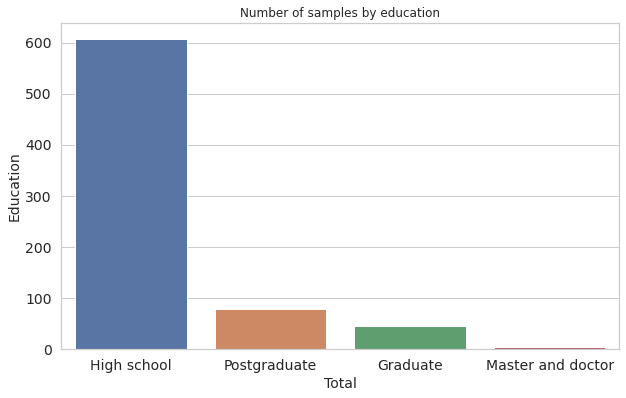

In [60]:
sns.countplot(data=df_mod, x='education_name')
plt.xlabel('Total')
plt.ylabel('Education')
plt.title('Number of samples by education')
plt.show()

### Qual a quantidade de amostras considerando o atributo Drinker?

In [61]:
df_mod.value_counts(subset=['Drinker'])

Drinker
1          418
0          319
dtype: int64

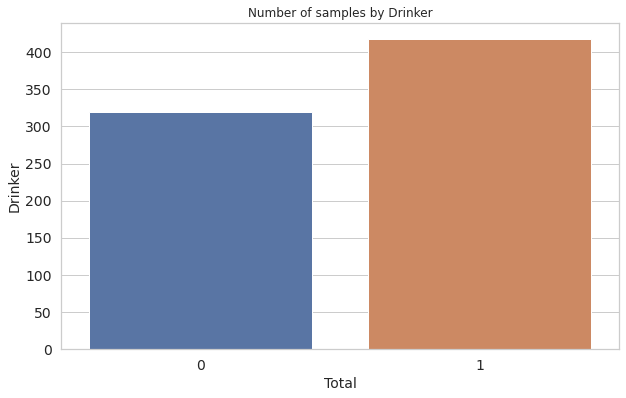

In [62]:
sns.countplot(data=df_mod, x='Drinker')
plt.xlabel('Total')
plt.ylabel('Drinker')
plt.title('Number of samples by Drinker')
plt.show()

### Qual a quantidade de amostras considerando o atributo Smoker?

In [63]:
df_mod.value_counts(subset=['Smoker'])

Smoker
0         683
1          54
dtype: int64

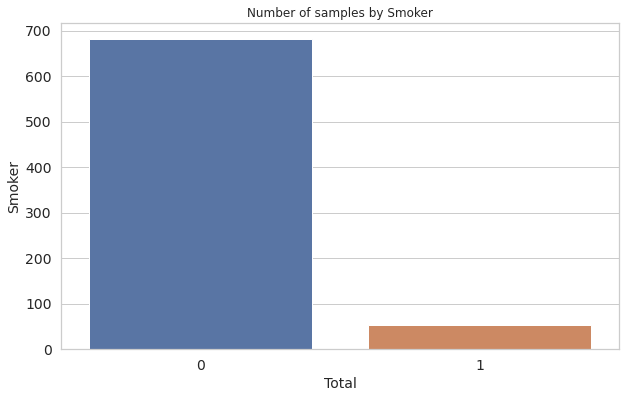

In [64]:
sns.countplot(data=df_mod, x='Smoker')
plt.xlabel('Total')
plt.ylabel('Smoker')
plt.title('Number of samples by Smoker')
plt.show()

### Qual a distribuição e outros valores considerando o gasto com transporte?




In [65]:
df_mod['TransportExpense'].describe()

count    737.000000
mean     221.514247
std       66.960952
min      118.000000
25%      179.000000
50%      225.000000
75%      260.000000
max      388.000000
Name: TransportExpense, dtype: float64

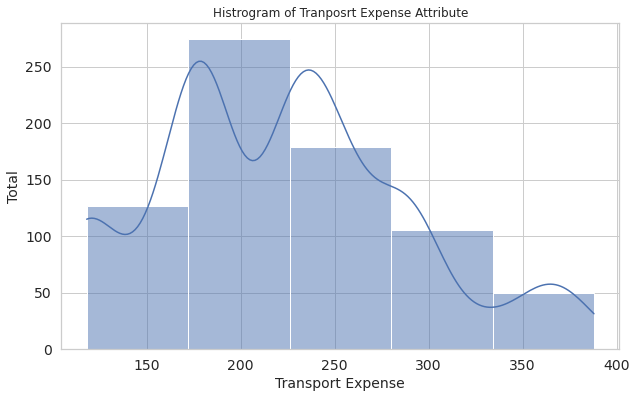

In [66]:
sns.histplot(data=df_mod, x='TransportExpense', bins=5, kde=True)
plt.xlabel('Transport Expense')
plt.ylabel('Total')
plt.title('Histrogram of Tranposrt Expense Attribute')
plt.show()

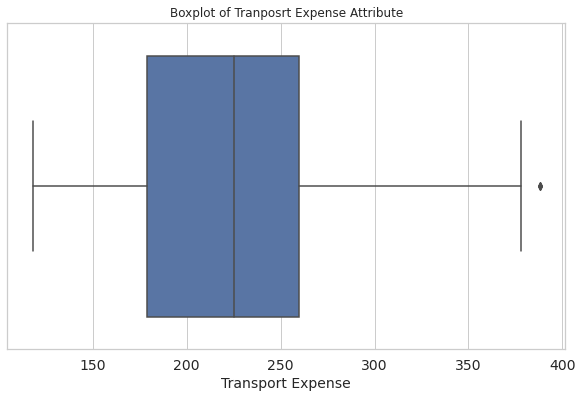

In [67]:
sns.boxplot(data=df_mod, x='TransportExpense')
plt.xlabel('Transport Expense')
plt.title('Boxplot of Tranposrt Expense Attribute')
plt.show()

### Qual a distribuição e outros valores considerando a distância?

In [68]:
df_mod['Distance'].describe()

count    737.000000
mean      29.624152
std       14.843701
min        5.000000
25%       16.000000
50%       26.000000
75%       50.000000
max       52.000000
Name: Distance, dtype: float64

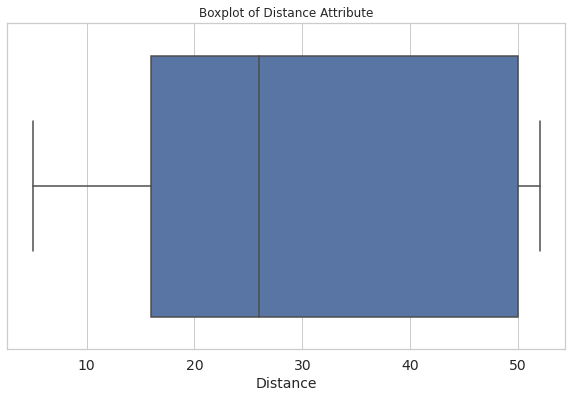

In [69]:
sns.boxplot(data=df_mod, x='Distance')
plt.xlabel('Distance')
plt.title('Boxplot of Distance Attribute')
plt.show()

### Qual a média de horas de absenteísmo por idade?

In [70]:
df_mod.columns

Index(['ID', 'Reason', 'reason_description', 'Month', 'month_name', 'Weekday',
       'Season', 'season_name', 'TransportExpense', 'Distance', 'ServiceTime',
       'Age', 'Workload', 'HitTarget', 'Failure', 'Education',
       'education_name', 'Child', 'Drinker', 'Smoker', 'Pet', 'Weight',
       'Height', 'BMI', 'AbsHours', 'Year'],
      dtype='object')

In [71]:
df_age = df_mod.groupby('Age')[['AbsHours']].sum()
df_age.head()

,AbsHours
Age,
27,27
28,651
29,31
30,253
31,217


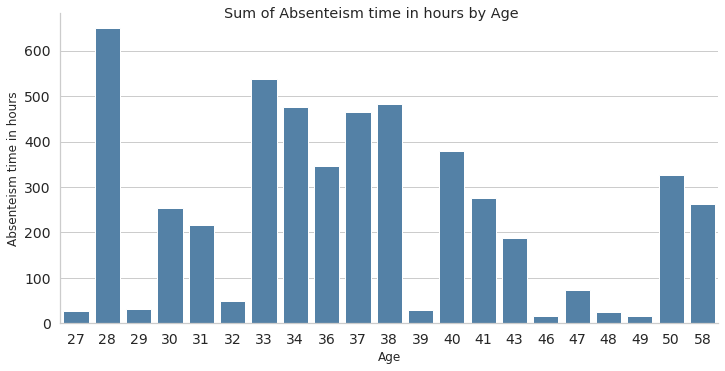

In [72]:
ax = sns.catplot(data=df_age, x=df_age.index, y='AbsHours', kind='bar', color='steelblue', aspect=2.0)
ax.set_axis_labels('Age', 'Absenteism time in hours', fontsize=12)
ax.fig.suptitle('Sum of Absenteism time in hours by Age')
plt.show()

In [73]:
df_age = df_mod.groupby('Age')[['AbsHours']].mean().reset_index()
df_age.head()

,Age,AbsHours
0,27,3.857143
1,28,5.564103
2,29,4.428571
3,30,5.500000
4,31,9.863636


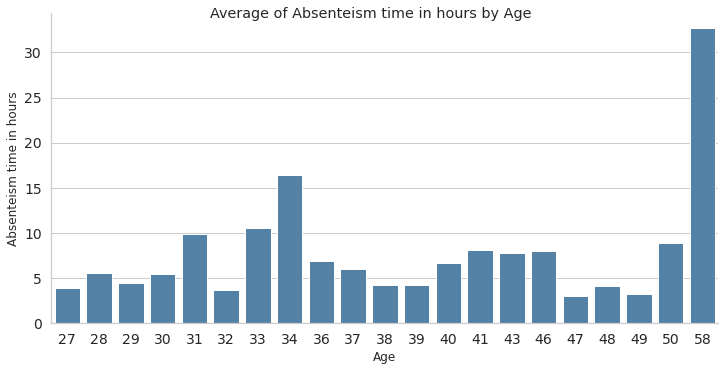

In [74]:
ax = sns.catplot(data=df_age, x='Age', y='AbsHours', kind='bar', color='steelblue', aspect=2.0)
ax.set_axis_labels('Age', 'Absenteism time in hours', fontsize=12)
ax.fig.suptitle('Average of Absenteism time in hours by Age')
plt.show()

In [75]:
df_mod.loc[df_mod['Age'] == 58, 'AbsHours']

255      8
434      8
521      1
620      3
622    112
640      2
727      8
729    120
Name: AbsHours, dtype: int64

In [76]:
df_mod['AbsHours'].describe()

count    737.000000
mean       6.952510
std       13.350793
min        0.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      120.000000
Name: AbsHours, dtype: float64

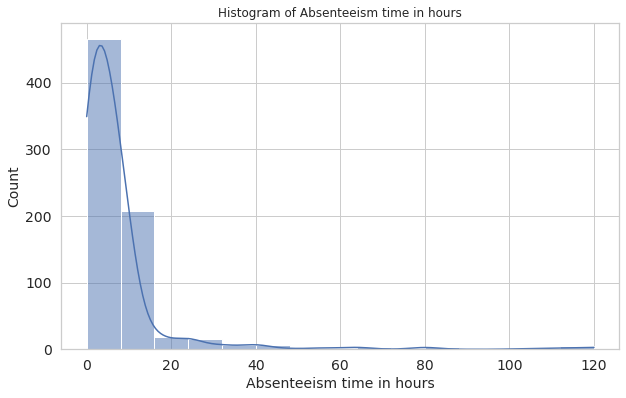

In [77]:
sns.histplot(data=df_mod, x='AbsHours', kde=True, bins=15)
plt.xlabel('Absenteeism time in hours')
plt.title('Histogram of Absenteeism time in hours', fontsize=12)
plt.show()

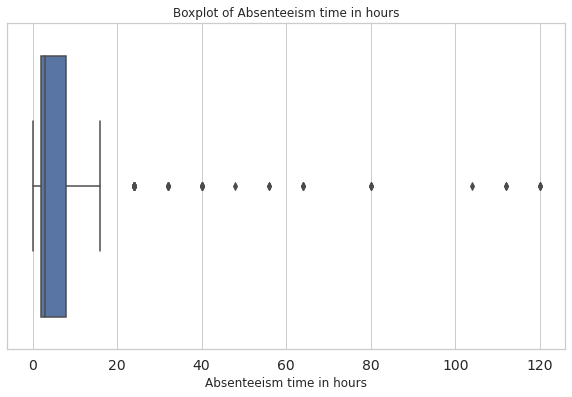

In [78]:
ax = sns.boxplot(data=df_mod, x='AbsHours')
ax.set_xlabel('Absenteeism time in hours', fontsize=12)
ax.set_title('Boxplot of Absenteeism time in hours')
plt.show()

In [79]:
df_mod[df_mod['AbsHours'] > 24].shape

(28, 26)

In [80]:
len(df_mod.columns)

26

### Qual a média de horas de absenteísmo por motivo (Reason)?

In [81]:
df_prepared = df_mod.copy()

### Excluir algumas colunas

In [82]:
df_prepared.head()

,ID,Reason,reason_description,Month,month_name,Weekday,Season,season_name,TransportExpense,Distance,...,education_name,Child,Drinker,Smoker,Pet,Weight,Height,BMI,AbsHours,Year
0,11,26,Unjustified absence,7,Jul,3,1,Summer,289,36,...,High school,2,1,0,1,90,172,30,4,2007
1,36,0,Unknown,7,Jul,3,1,Summer,118,13,...,High school,1,1,0,0,98,178,31,0,2007
2,3,23,Medical consultation,7,Jul,4,1,Summer,179,51,...,High school,0,1,0,0,89,170,31,2,2007
3,7,7,Diseases of the eye and adnexa,7,Jul,5,1,Summer,279,5,...,High school,2,1,1,0,68,168,24,4,2007
4,11,23,Medical consultation,7,Jul,5,1,Summer,289,36,...,High school,2,1,0,1,90,172,30,2,2007


In [83]:
df_prepared.drop(columns=['ID', 'reason_description', 'season_name', 'month_name', 'education_name', 'Weight', 'Height', 'Year'], inplace=True)

In [84]:
df_prepared.head()

,Reason,Month,Weekday,Season,TransportExpense,Distance,ServiceTime,Age,Workload,HitTarget,Failure,Education,Child,Drinker,Smoker,Pet,BMI,AbsHours
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,4
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,31,2
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,24,4
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,2


## Applying Machine Learning

### Criando os targets

Quais serão as classes? Dado que queremos tornar nosso problema em uma tarefa de classificação?

Vamos considerar o valor mediano do tempo de ausência. **Tudo abaixo da mediana será considerado normal e tudo acima da mediana será considerado excesso**

In [85]:
df_prepared['AbsHours'].median()

3.0

In [86]:
targets = np.where(df['AbsHours'] > 3, 1, 0)

In [87]:
df_prepared['target'] = targets
df_prepared.head()

,Reason,Month,Weekday,Season,TransportExpense,Distance,ServiceTime,Age,Workload,HitTarget,Failure,Education,Child,Drinker,Smoker,Pet,BMI,AbsHours,target
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,4,1
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,31,0,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,31,2,0
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,24,4,1
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,2,0


### Analisando a distribuição das classes

In [88]:
targets.sum() / len(targets)

0.4599728629579376

In [89]:
data = df_prepared.groupby(by='target')['target'].count()
data

target
0    398
1    339
Name: target, dtype: int64

<AxesSubplot:ylabel='target'>

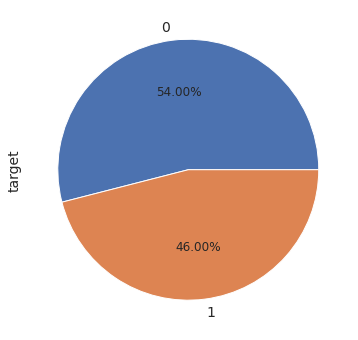

In [90]:
data.plot.pie(autopct='%.2f%%')

In [91]:
df_prepared.drop(columns='AbsHours', inplace=True)

In [92]:
df_prepared.head()

,Reason,Month,Weekday,Season,TransportExpense,Distance,ServiceTime,Age,Workload,HitTarget,Failure,Education,Child,Drinker,Smoker,Pet,BMI,target
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,1
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,31,0
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,24,1
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30,0


### Dividindo a base de dados em treinamento e teste

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
df_prepared.shape

(737, 18)

In [95]:
df_prepared_no_targets = df_prepared.iloc[:, :-1]
df_prepared_no_targets.head()

,Reason,Month,Weekday,Season,TransportExpense,Distance,ServiceTime,Age,Workload,HitTarget,Failure,Education,Child,Drinker,Smoker,Pet,BMI
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,31
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,31
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,24
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,30


In [96]:
X_train, X_test, y_train, y_test = train_test_split(df_prepared_no_targets, targets, train_size=0.8, random_state=666)

In [97]:
print(X_train.shape, y_train.shape)

(589, 17) (589,)


In [98]:
print(X_test.shape, y_test.shape)

(148, 17) (148,)


## Criando uma regressão logística para classificação

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

**Treinando o modelo**

In [100]:
reg = LogisticRegression()

In [101]:
reg.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [102]:
reg.score(X_train, y_train)

0.6842105263157895

In [103]:
y_pred_train = reg.predict(X_train)
y_pred_train

array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [104]:
metrics.accuracy_score(y_train, y_pred_train)

0.6842105263157895

In [105]:
cnf_matrix = metrics.confusion_matrix(y_train, y_pred_train)
cnf_matrix

array([[242,  75],
       [111, 161]])

In [106]:
pd.crosstab(y_train, y_pred_train, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,242,75
1,111,161


In [107]:
print(metrics.classification_report(y_train, y_pred_train, target_names=['Normal', 'Excessivo']))

              precision    recall  f1-score   support

      Normal       0.69      0.76      0.72       317
   Excessivo       0.68      0.59      0.63       272

    accuracy                           0.68       589
   macro avg       0.68      0.68      0.68       589
weighted avg       0.68      0.68      0.68       589



In [108]:
# precision = TP / (TP + FP)
precision = 161 / (161 + 75)
precision

0.6822033898305084

In [109]:
# recall = TP / (TP + FN)
recall = 161 / (161 + 111)
recall

0.5919117647058824

### Validação cruzada - Cross Validation

Técnica para avaliar a capacidade de generalização de um modelo preditivo

![](https://miro.medium.com/1*kkMtezwv8qj1t9uG4nw_8g.png)

In [114]:
from sklearn.model_selection import KFold

In [115]:
X_train.shape

(589, 17)

In [116]:
n_folds = 3
kf = KFold(n_splits=n_folds)

In [121]:
i = 0
for index in kf.split(X_train):
    print(f'Fold[{i+1}]')
    print(index)
    print()
    i += 1

Fold[1]
(array([197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209,
       210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222,
       223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235,
       236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248,
       249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261,
       262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274,
       275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287,
       288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300,
       301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313,
       314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326,
       327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339,
       340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352,
       353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365,
       366, 367, 368, 369, 370, 371, 372, 373, 374, 375

In [122]:
i = 0
for index in kf.split(X_train):
    print(f'Fold[{i+1}]')
    X_train_cv, X_test_cv = X_train.iloc[index[0]], X_train.iloc[index[1]]
    i += 1

Fold[1]
Fold[2]
Fold[3]


In [123]:
X_train_cv.shape

(393, 17)

In [124]:
X_test_cv.shape

(196, 17)

In [130]:
n_folds = 10
kf = KFold(n_splits=n_folds)

i = 0
y_preds = []
y_tests = []
for index in kf.split(X_train):
    print(f'It[{i+1}]')
    X_train_cv, y_train_cv, X_test_cv, y_test_cv = X_train.iloc[index[0]],y_train[index[0]], X_train.iloc[index[1]], y_train[index[1]]
    
    # Treinar o modelo
    reg = LogisticRegression()
    reg.fit(X_train_cv, y_train_cv)
    y_pred = reg.predict(X_test_cv)
    
    y_preds = np.append(y_preds, y_pred)
    y_tests = np.append(y_tests, y_test_cv)
    
    #print(metrics.classification_report(y_test_cv, y_pred, target_names=['Normal', 'Excessivo']))
    
    i += 1

It[1]
It[2]
It[3]
It[4]
It[5]
It[6]
It[7]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

It[8]
It[9]
It[10]


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [131]:
print(metrics.classification_report(y_tests, y_preds, target_names=['Normal', 'Excessivo']))

              precision    recall  f1-score   support

      Normal       0.67      0.73      0.70       317
   Excessivo       0.65      0.59      0.62       272

    accuracy                           0.67       589
   macro avg       0.66      0.66      0.66       589
weighted avg       0.66      0.67      0.66       589



In [132]:
pd.crosstab(y_tests, y_preds, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0
Actual,,
0.0,232,85
1.0,112,160


### Padronizando os dados

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
# Subtrai a média e divide pelo desvio padrão. Isso é feito para todas as colunas e valores
abs_scaler = StandardScaler()

In [135]:
abs_scaler.fit(X_train)

StandardScaler()

In [136]:
X_train_scaled = abs_scaler.transform(X_train)
X_train_scaled

array([[ 0.93358265, -1.29416027,  0.77474449, ..., -0.29447558,
        -0.57146879, -1.73699663],
       [ 0.81296844, -0.11737849, -0.62074329, ..., -0.29447558,
        -0.57146879,  2.60297419],
       [-1.11685891, -0.11737849,  1.47248838, ..., -0.29447558,
        -0.57146879, -0.82331857],
       ...,
       [ 0.45112581,  1.05940329,  0.0770006 , ..., -0.29447558,
         0.20231309,  1.23245709],
       [ 1.05419686, -0.41157393,  0.0770006 , ..., -0.29447558,
        -0.57146879,  1.00403757],
       [-0.03133103,  0.17681696, -0.62074329, ..., -0.29447558,
        -0.57146879, -0.36647953]])

In [140]:
n_folds = 10
kf = KFold(n_splits=n_folds)

i = 0
y_preds = []
y_tests = []
for index in kf.split(X_train_scaled):
    print(f'It[{i+1}]')
    X_train_cv, y_train_cv, X_test_cv, y_test_cv = X_train_scaled[index[0]],y_train[index[0]], X_train_scaled[index[1]], y_train[index[1]]
    
    # Treinar o modelo
    reg = LogisticRegression()
    reg.fit(X_train_cv, y_train_cv)
    y_pred = reg.predict(X_test_cv)
    
    y_preds = np.append(y_preds, y_pred)
    y_tests = np.append(y_tests, y_test_cv)
    
    #print(metrics.classification_report(y_test_cv, y_pred, target_names=['Normal', 'Excessivo']))
    
    i += 1

It[1]
It[2]
It[3]
It[4]
It[5]
It[6]
It[7]
It[8]
It[9]
It[10]


In [141]:
print(metrics.classification_report(y_tests, y_preds, target_names=['Normal', 'Excessivo']))

              precision    recall  f1-score   support

      Normal       0.75      0.78      0.77       317
   Excessivo       0.73      0.70      0.72       272

    accuracy                           0.75       589
   macro avg       0.74      0.74      0.74       589
weighted avg       0.74      0.75      0.74       589



In [142]:
pd.crosstab(y_tests, y_preds, rownames=['Actual'], colnames=['Predicted'])

Predicted,0.0,1.0
Actual,,
0.0,248,69
1.0,81,191


In [110]:
y_pred_test = reg.predict(X_test)

In [111]:
metrics.accuracy_score(y_test, y_pred_test)

0.6554054054054054

In [112]:
pd.crosstab(y_test, y_pred_test, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,65,16
1,35,32


In [113]:
print(metrics.classification_report(y_test, y_pred_test, target_names=['Normal', 'Excessivo']))

              precision    recall  f1-score   support

      Normal       0.65      0.80      0.72        81
   Excessivo       0.67      0.48      0.56        67

    accuracy                           0.66       148
   macro avg       0.66      0.64      0.64       148
weighted avg       0.66      0.66      0.65       148

